In [47]:
!pip install mpl_finance

In [84]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

# 1- Lodaing the *Data*

In [86]:
df = pd.read_csv('/content/finance-yahoo-26-07-25.csv')

In [43]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
1996-08-09,14.250,16.750,14.250,16.500,14.474142,1601500,0.157895
1996-08-12,16.500,16.750,16.375,16.500,14.474142,260900,0.000000
1996-08-13,16.500,16.750,16.375,16.375,14.364487,162800,-0.007576
1996-08-14,16.375,16.625,16.375,16.375,14.364487,59500,0.000000
1996-08-15,16.625,16.625,16.375,16.625,14.583791,62300,0.000000


In [24]:
df.shape

(6784, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6784 entries, 0 to 6783
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6784 non-null   object 
 1   Open       6784 non-null   float64
 2   High       6784 non-null   float64
 3   Low        6784 non-null   float64
 4   Close      6784 non-null   float64
 5   Adj Close  6784 non-null   float64
 6   Volume     6784 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 371.1+ KB


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-08-09,14.250000,16.750000,14.250000,16.500000,14.474142,1601500
1,1996-08-12,16.500000,16.750000,16.375000,16.500000,14.474142,260900
2,1996-08-13,16.500000,16.750000,16.375000,16.375000,14.364487,162800
3,1996-08-14,16.375000,16.625000,16.375000,16.375000,14.364487,59500
4,1996-08-15,16.625000,16.625000,16.375000,16.625000,14.583791,62300
...,...,...,...,...,...,...,...
6779,2023-07-19,33.669998,33.669998,33.000000,33.380001,33.380001,116300
6780,2023-07-20,33.490002,34.029999,33.279999,33.959999,33.959999,158800
6781,2023-07-21,34.080002,34.240002,33.470001,33.570000,33.570000,80600
6782,2023-07-24,33.450001,33.700001,33.060001,33.279999,33.279999,47400


# 2- Data Cleaning

In [25]:
df = df.copy()

In [26]:
df['Volume'] = df['Volume'].astype(float).apply(lambda x: '{:.2f}'.format(x))

In [29]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-08-09,14.250,16.750,14.250,16.500,14.474142,1601500.00
1,1996-08-12,16.500,16.750,16.375,16.500,14.474142,260900.00
2,1996-08-13,16.500,16.750,16.375,16.375,14.364487,162800.00
3,1996-08-14,16.375,16.625,16.375,16.375,14.364487,59500.00
4,1996-08-15,16.625,16.625,16.375,16.625,14.583791,62300.00


In [27]:
# count the number of null values in each column
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [28]:
# Check for duplicates
print(df.duplicated().sum())

0


#3- Data Exploration & Questions and answers

The best performing days are:
               Open       High    Low  Close  Adj Close  Volume  Daily Return
Date                                                                         
2009-02-26   1.5400   1.540000   1.10   1.50   1.315831  299400      0.600000
2001-03-07   2.5000   2.650000   2.50   2.65   2.324635    5400      0.226414
2008-11-17   2.2200   2.260000   2.11   2.22   1.947430   13100      0.225225
2020-05-19  15.4000  16.389999  15.27  15.79  15.188025  286800      0.220393
2000-08-14   2.0625   2.062500   2.00   2.00   1.754441   25100      0.218751

The worst performing days are:
                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2022-10-26  31.660000  32.669998  31.559999  32.070000  31.670965  143200   
2008-08-07   6.100000   6.190000   6.080000   6.130000   5.377362   22700   
1999-08-12  14.500000  15.000000  14.500000  15.000000  13.158311   42200   
2018-10

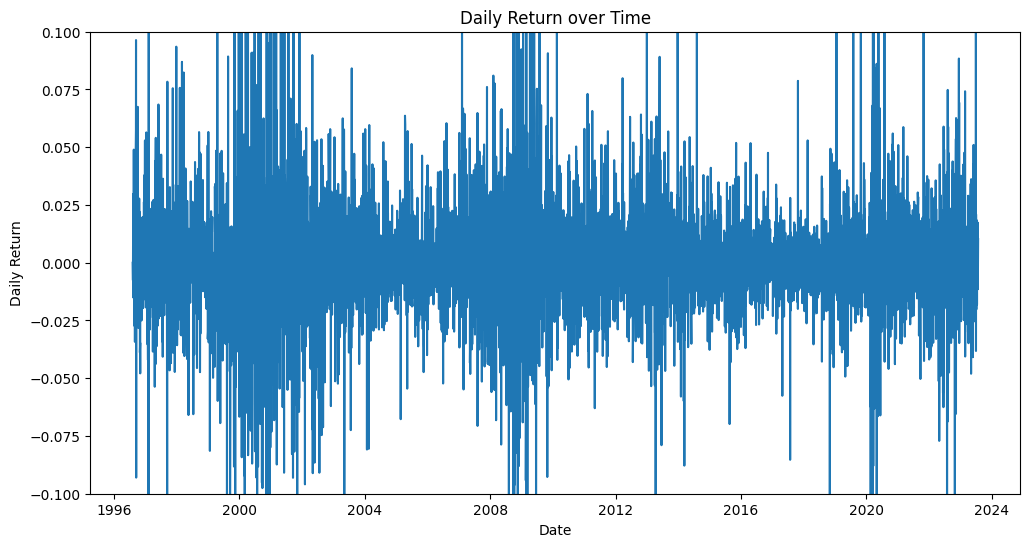

In [82]:
# Convert the 'Date' column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the data frame
df.set_index('Date', inplace=True)

# Calculate the daily rate of return for each day
df['Daily Return'] = (df['Adj Close'].shift(-1) - df['Adj Close']) / df['Adj Close']

# Find the dates with the highest and lowest daily returns
best_days = df.nlargest(5, 'Daily Return')
worst_days = df.nsmallest(5, 'Daily Return')

# Print the best and worst performing days
print("The best performing days are:")
print(best_days)
print("\nThe worst performing days are:")
print(worst_days)


# Create a line chart to show the daily rate of return over time
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Daily Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Return over Time')
plt.ylim(bottom=-0.1, top=0.1)

plt.show()

In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Year,daily_return
Date,,,,,,,,,
1996-08-09,14.250,16.750,14.250,16.500,14.474142,1601500.00,NaN,1996,NaN
1996-08-12,16.500,16.750,16.375,16.500,14.474142,260900.00,0.000000,1996,0.000000
1996-08-13,16.500,16.750,16.375,16.375,14.364487,162800.00,-0.007576,1996,-0.007576
1996-08-14,16.375,16.625,16.375,16.375,14.364487,59500.00,0.000000,1996,0.000000
1996-08-15,16.625,16.625,16.375,16.625,14.583791,62300.00,0.015267,1996,0.015267


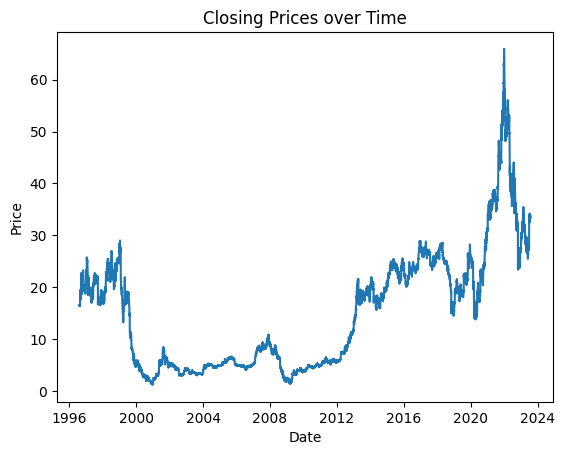

<ipython-input-87-e34549126698>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)


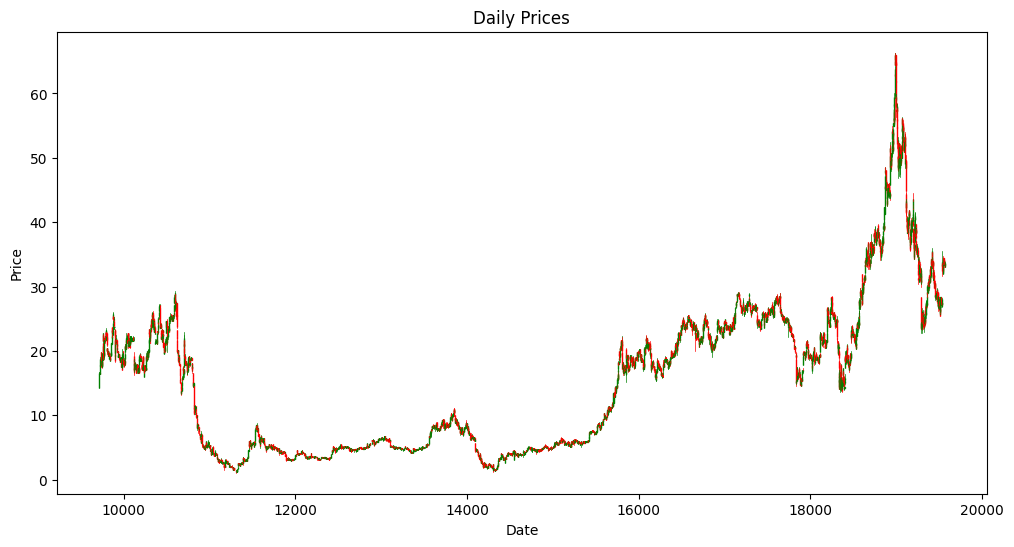

<Figure size 1200x600 with 0 Axes>

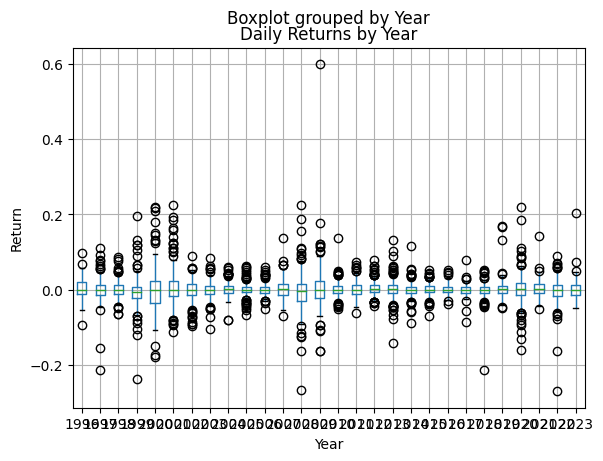

In [87]:
# Convert the Date column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Create a line plot of the closing prices over time
plt.plot(df['Close'])
plt.title('Closing Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


df_ohlc = df[['Open', 'High', 'Low', 'Close']]
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

plt.figure(figsize=(12, 6))
candlestick_ohlc(plt.gca(), df_ohlc.values, width=0.6, colorup='g', colordown='r')
plt.title('Daily Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Create a box plot of the daily returns by year
df['Daily Return'] = df['Close'].pct_change()
df['Year'] = df.index.year

plt.figure(figsize=(12, 6))
df.boxplot(column='Daily Return', by='Year')
plt.title('Daily Returns by Year')
plt.xlabel('Year')
plt.ylabel('Return')
plt.show()